<h1 align="center">
    Tic Tac Toe
</h1>

In [1]:
import sys
import sqlite3
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(
    style='whitegrid', 
    color_codes=True
)

In [4]:
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

## Warning filter

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

## SQL Queries

In [7]:
X_Query: str = '''
SELECT 
    "ROW_1_1" as "ROW_1_1",
    "ROW_1_2" as "ROW_1_2",
    "ROW_1_3" as "ROW_1_3",
    "ROW_2_1" as "ROW_2_1",
    "ROW_2_2" as "ROW_2_2",
    "ROW_2_3" as "ROW_2_3",
    "ROW_3_1" as "ROW_3_1",
    "ROW_3_2" as "ROW_3_2",
    "ROW_3_3" as "ROW_3_3"
FROM "tic-tac-toe";
'''.strip()

In [8]:
y_Query: str = '''
SELECT 
    "RESULT" as "RESULT" 
FROM "tic-tac-toe";
'''.strip()

## Reading Dataset

In [9]:
conn = sqlite3.connect("data/Tic-Tac-Toe.sqlite3")

In [10]:
X = pd.read_sql(
    sql=X_Query, 
    con=conn
)

In [11]:
y = pd.read_sql(
    sql=y_Query, 
    con=conn
)

In [12]:
X_columns: list = X.columns.to_list()

In [13]:
y_columns: list = y.columns.to_list()

In [14]:
X.head()

,ROW_1_1,ROW_1_2,ROW_1_3,ROW_2_1,ROW_2_2,ROW_2_3,ROW_3_1,ROW_3_2,ROW_3_3
0,x,x,x,x,o,o,x,o,o
1,x,x,x,x,o,o,o,x,o
2,x,x,x,x,o,o,o,o,x
3,x,x,x,x,o,o,o,b,b
4,x,x,x,x,o,o,b,o,b


## Label Encoding

In [15]:
y[y_columns[0]].value_counts()

positive    626
negative    332
Name: RESULT, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit(y[y_columns[0]])
y[y_columns[0]] = pd.DataFrame(labelEncoder.transform(y[y_columns[0]]))

In [17]:
df = pd.concat(
    objs=[X, y], 
    ignore_index=False, 
    sort=False, 
    axis=1
)

In [18]:
conn.close()

In [19]:
X.shape

(958, 9)

In [20]:
y.shape

(958, 1)

In [21]:
df.shape

(958, 10)

## Datatype Fixing of the Categorical data of y

In [22]:
for col in y_columns:
    y[col] = y[col].astype('category')

1    626
0    332
Name: RESULT, dtype: int64


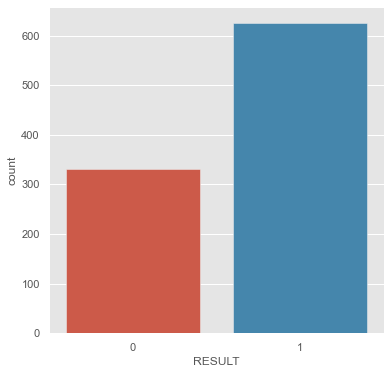

In [23]:
print(y[y_columns[0]].value_counts())
plt.figure(
    figsize=(6, 6)
)
sns.countplot(
    x=y[y_columns[0]]
);

## Dummy Variable 

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = pd.get_dummies(
    X, 
    columns=X_columns
)

In [25]:
X.head()

,ROW_1_1_b,ROW_1_1_o,ROW_1_1_x,ROW_1_2_b,ROW_1_2_o,ROW_1_2_x,ROW_1_3_b,ROW_1_3_o,ROW_1_3_x,ROW_2_1_b,...,ROW_2_3_x,ROW_3_1_b,ROW_3_1_o,ROW_3_1_x,ROW_3_2_b,ROW_3_2_o,ROW_3_2_x,ROW_3_3_b,ROW_3_3_o,ROW_3_3_x
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=1,
    stratify=y
)

## Classifier

In [27]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

## XGboost

In [28]:
classifier = XGBClassifier(
    booster = 'gbtree',
    max_depth=5,
    n_estimators=1500,
    learning_rate=0.3,
    importance_type='gain',
    random_state= 0,
    n_jobs=8
)
classifier.fit(X_train, y_train);
prediction = classifier.predict(X_test)
cm = confusion_matrix(
    y_true=y_test, 
    y_pred=prediction
)
print(cm)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))
print(
    classification_report(
        y_true=y_test,
        y_pred=prediction,
        target_names=['Phishing', 'Legitimate'],
        zero_division='warn',
        digits=5
    )
)

[[100   0]
 [  1 187]]
Accuracy: 99.65%
              precision    recall  f1-score   support

    Phishing    0.99010   1.00000   0.99502       100
  Legitimate    1.00000   0.99468   0.99733       188

    accuracy                        0.99653       288
   macro avg    0.99505   0.99734   0.99618       288
weighted avg    0.99656   0.99653   0.99653       288



## Logistic Regression

In [29]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train);
prediction = classifier.predict(X_test)
cm = confusion_matrix(
    y_true=y_test, 
    y_pred=prediction
)
print(cm)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))
print(
    classification_report(
        y_true=y_test,
        y_pred=prediction,
        target_names=['Phishing', 'Legitimate'],
        zero_division='warn',
        digits=5
    )
)

[[ 98   2]
 [  0 188]]
Accuracy: 99.31%
              precision    recall  f1-score   support

    Phishing    1.00000   0.98000   0.98990       100
  Legitimate    0.98947   1.00000   0.99471       188

    accuracy                        0.99306       288
   macro avg    0.99474   0.99000   0.99230       288
weighted avg    0.99313   0.99306   0.99304       288



## Gaussian Naive Bayes

In [30]:
classifier = GaussianNB()
classifier.fit(X_train, y_train);
prediction = classifier.predict(X_test)
cm = confusion_matrix(
    y_true=y_test, 
    y_pred=prediction
)
print(cm)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))
print(
    classification_report(
        y_true=y_test,
        y_pred=prediction,
        target_names=['Phishing', 'Legitimate'],
        zero_division='warn',
        digits=5
    )
)

[[ 50  50]
 [ 37 151]]
Accuracy: 69.79%
              precision    recall  f1-score   support

    Phishing    0.57471   0.50000   0.53476       100
  Legitimate    0.75124   0.80319   0.77635       188

    accuracy                        0.69792       288
   macro avg    0.66298   0.65160   0.65555       288
weighted avg    0.68995   0.69792   0.69246       288



## Multinomial Naive Bayes

In [31]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train);
prediction = classifier.predict(X_test)
cm = confusion_matrix(
    y_true=y_test, 
    y_pred=prediction
)
print(cm)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))
print(
    classification_report(
        y_true=y_test,
        y_pred=prediction,
        target_names=['Phishing', 'Legitimate'],
        zero_division='warn',
        digits=5
    )
)

[[ 41  59]
 [ 22 166]]
Accuracy: 71.88%
              precision    recall  f1-score   support

    Phishing    0.65079   0.41000   0.50307       100
  Legitimate    0.73778   0.88298   0.80387       188

    accuracy                        0.71875       288
   macro avg    0.69429   0.64649   0.65347       288
weighted avg    0.70757   0.71875   0.69943       288



## Adaboost

In [32]:
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train);
prediction = classifier.predict(X_test)
cm = confusion_matrix(
    y_true=y_test, 
    y_pred=prediction
)
print(cm)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))
print(
    classification_report(
        y_true=y_test,
        y_pred=prediction,
        target_names=['Phishing', 'Legitimate'],
        zero_division='warn',
        digits=5
    )
)

[[ 62  38]
 [  7 181]]
Accuracy: 84.38%
              precision    recall  f1-score   support

    Phishing    0.89855   0.62000   0.73373       100
  Legitimate    0.82648   0.96277   0.88943       188

    accuracy                        0.84375       288
   macro avg    0.86252   0.79138   0.81158       288
weighted avg    0.85151   0.84375   0.83537       288



## KNN

In [33]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train);
prediction = classifier.predict(X_test)
cm = confusion_matrix(
    y_true=y_test, 
    y_pred=prediction
)
print(cm)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))
print(
    classification_report(
        y_true=y_test,
        y_pred=prediction,
        target_names=['Phishing', 'Legitimate'],
        zero_division='warn',
        digits=5
    )
)

[[ 94   6]
 [  2 186]]
Accuracy: 97.22%
              precision    recall  f1-score   support

    Phishing    0.97917   0.94000   0.95918       100
  Legitimate    0.96875   0.98936   0.97895       188

    accuracy                        0.97222       288
   macro avg    0.97396   0.96468   0.96907       288
weighted avg    0.97237   0.97222   0.97208       288

